In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from CreditScoreModel.LogisticScoreCard import logistic_score_card
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import seaborn as sns
sns.set_context(font_scale=2)

In [3]:
data=pd.read_csv("D:/Nikkidata/ren/csv/RRDAIY_NUM.csv")

C:\Users\mb95424\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mb95424\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


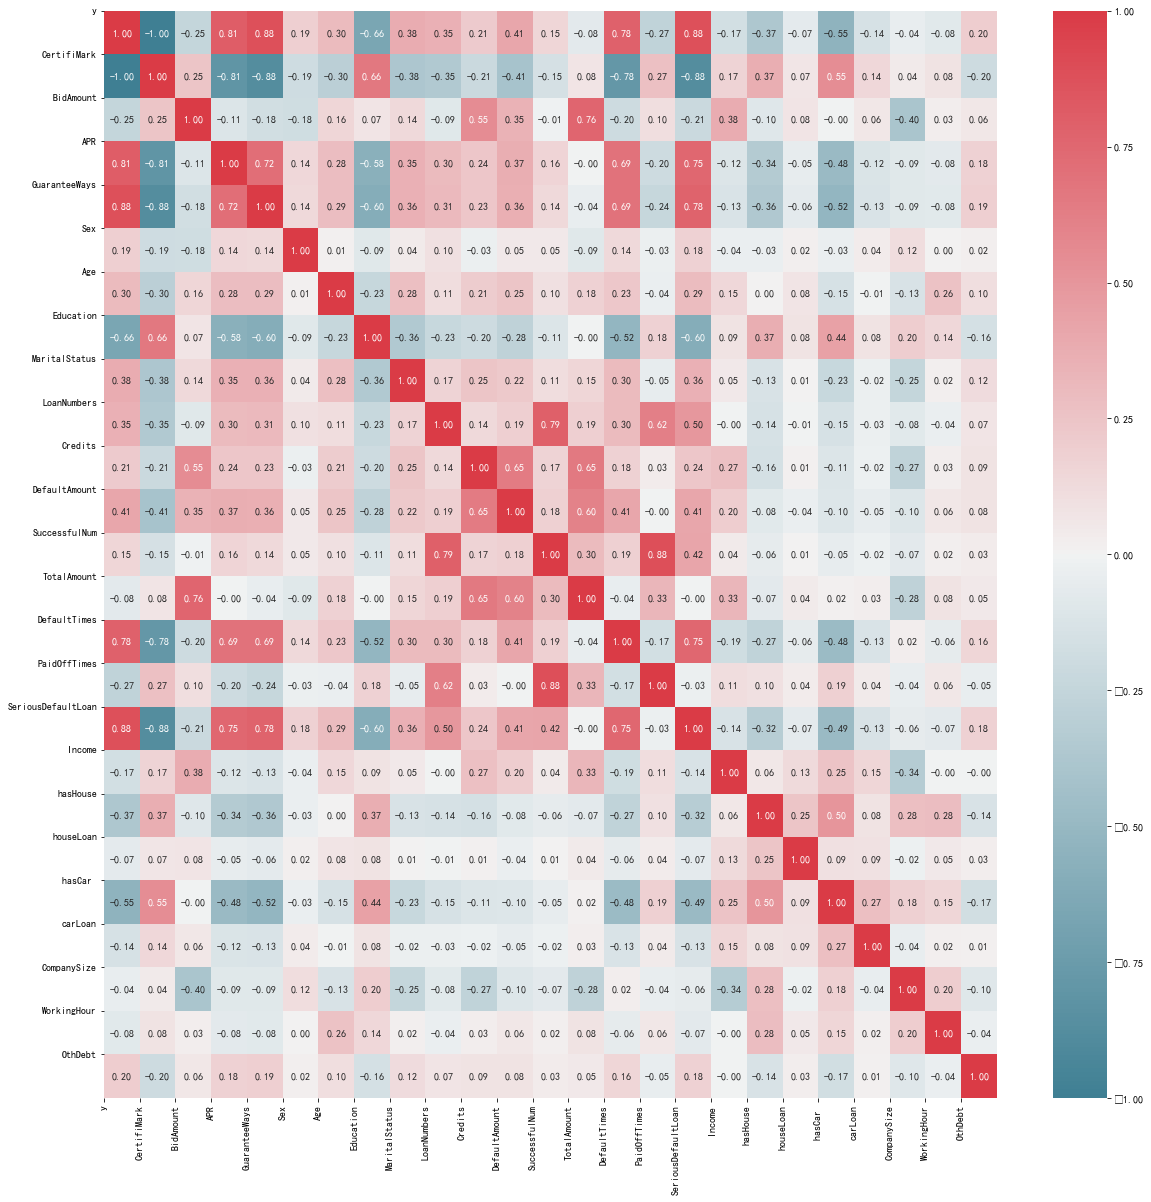

In [25]:
corr = data.corr()
    #Plot figsize
fig, ax = plt.subplots(figsize=(20, 20))
    #Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [9]:
c = data.pop('ProjectStatus')             
data.insert(0,'y',c)  
#把ProjectStatus列变名字成y,移动到第一列

In [10]:
data.columns=['y','CertifiMark','BidAmount', 'APR','GuaranteeWays', 'Sex', 'Age','Education', 'MaritalStatus','LoanNumbers', 'Credits','DefaultAmount'
             , 'SuccessfulNum','TotalAmount', 'DefaultTimes','PaidOffTimes'
             , 'SeriousDefaultLoan','Income', 'hasHouse','houseLoan'
             , 'hasCar ','carLoan', 'CompanySize','WorkingHour','OthDebt']
data=data.round(2)

In [11]:
import sklearn

In [12]:
ls=logistic_score_card()
data_train, data_test = ls.get_data_train_test(data,test_size=0.25,random_state=1234)
ls.fit(data_train)

2021 14:14:34 INFO 任务开始。。。
2021 14:14:34 INFO 连续和离散变量划分中。。。
2021 14:14:34 INFO 连续和离散变量划分完成！
2021 14:14:34 INFO 连续变量最优分组进行中。。。
100%|██████████| 24/24 [00:00<00:00, 289.97it/s]
2021 14:14:34 INFO 连续变量最优分组完成！
2021 14:14:34 INFO 根据cut离散化连续变量进行中。。。
100%|██████████| 24/24 [00:00<00:00, 343.79it/s]
2021 14:14:34 INFO 根据cut离散化连续变量完成！
2021 14:14:34 INFO IV值计算中。。。
  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\mb95424\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
100%|██████████| 24/24 [00:00<00:00, 111.04it/s]
2021 14:14:34 INFO IV值计算完成！
2021 14:14:34 INFO WOE转换中。。。
100%|██████████| 24/24 [00:00<00:00, 94.36it/s]
2021 14:14:34 INFO WOE转换完成！
2021 14:14:34 INFO 根据IV值大于 0.1 且 相关性小于 0.6 ，以及l1正则选取变量进行中。。。
2021 14:14:34 INFO 变量选取完成，总共 24 个变量，最终筛选出 6 个变量
2021 14:14:34 INFO 评分卡制作中。。。
2021 14:14:34 INFO 连续和离散变量划分中。。。
2021 14:14:34 INFO 连续和离散变量划分完成！
2021 14:14:34 INFO 根据cut离散化连续变量进行中。。。
100%

In [13]:
ls.score_card

,col,type,cuts,cut_points,1_num,0_num,total_num,1_pct,0_pct,total_pct,1_rate,woe,iv,total_iv,col_coef,lr_intercept,score
0,APR,continuous,"[-inf, 9.5, 9.6, 10.8, inf]","(-inf, 9.5]",5,2210,2215,0.001621,0.598429,0.326793,0.002257,-5.911422,3.527988,3.665107,0.997952,-0.502183,425.545541
1,APR,continuous,"[-inf, 9.5, 9.6, 10.8, inf]","(9.5, 9.6]",0,1059,1059,0.000000,0.286759,0.156241,0.000000,0.000000,0.000000,3.665107,0.997952,-0.502183,-0.000000
2,APR,continuous,"[-inf, 9.5, 9.6, 10.8, inf]","(9.6, 10.8]",77,424,501,0.024959,0.114812,0.073916,0.153693,-1.526041,0.137118,3.665107,0.997952,-0.502183,109.855075
3,APR,continuous,"[-inf, 9.5, 9.6, 10.8, inf]","(10.8, inf]",3003,0,3003,0.973420,0.000000,0.443051,1.000000,0.000000,0.000000,3.665107,0.997952,-0.502183,-0.000000
4,BidAmount,continuous,"[-inf, 10000.0, 29900.0, 30000.0, inf]","(-inf, 10000.0]",829,273,1102,0.268720,0.073924,0.162585,0.752269,1.290636,0.251411,0.752840,1.290596,-0.502183,-120.154137
5,BidAmount,continuous,"[-inf, 10000.0, 29900.0, 30000.0, inf]","(10000.0, 29900.0]",1435,1550,2985,0.465154,0.419713,0.440395,0.480737,0.102797,0.004671,0.752840,1.290596,-0.502183,-9.570114
6,BidAmount,continuous,"[-inf, 10000.0, 29900.0, 30000.0, inf]","(29900.0, 30000.0]",321,73,394,0.104052,0.019767,0.058129,0.814721,1.660869,0.139986,0.752840,1.290596,-0.502183,-154.621695
7,BidAmount,continuous,"[-inf, 10000.0, 29900.0, 30000.0, inf]","(30000.0, inf]",500,1797,2297,0.162075,0.486596,0.338891,0.217675,-1.099378,0.356772,0.752840,1.290596,-0.502183,102.348663
8,CompanySize,continuous,"[-inf, 1.0, 2.0, 3.0, inf]","(-inf, 1.0]",528,816,1344,0.171151,0.220959,0.198289,0.392857,-0.255431,0.012722,3.607544,0.736888,-0.502183,13.577466
9,CompanySize,continuous,"[-inf, 1.0, 2.0, 3.0, inf]","(1.0, 2.0]",1260,54,1314,0.408428,0.014622,0.193862,0.958904,3.329770,1.311282,3.607544,0.736888,-0.502183,-176.994641


In [14]:
ls.col_type_iv

,col,type,iv
0,CertifiMark,continuous,0.000000
1,BidAmount,continuous,0.752840
2,APR,continuous,3.665107
3,GuaranteeWays,continuous,1.948496
4,Sex,continuous,0.148971
5,Age,continuous,0.579997
6,Education,continuous,2.682484
7,MaritalStatus,continuous,1.026660
8,LoanNumbers,continuous,1.754217
9,Credits,continuous,2.495628


In [15]:
ls.col_continuous_cut_points

[['CertifiMark', [-inf, 1.0, inf]],
 ['BidAmount', [-inf, 10000.0, 29900.0, 30000.0, inf]],
 ['APR', [-inf, 9.5, 9.6, 10.8, inf]],
 ['GuaranteeWays', [-inf, 0.0, inf]],
 ['Sex', [-inf, 1.0, inf]],
 ['Age', [-inf, 26.0, 31.0, 37.0, inf]],
 ['Education', [-inf, 1.0, 2.0, inf]],
 ['MaritalStatus', [-inf, 3.0, inf]],
 ['LoanNumbers', [-inf, 1.0, 2.0, 3.0, inf]],
 ['Credits', [-inf, 0.0, 30000.0, 60000.0, inf]],
 ['DefaultAmount', [-inf, 0.0, inf]],
 ['SuccessfulNum', [-inf, 1.0, inf]],
 ['TotalAmount', [-inf, 19000.0, 29900.0, 30000.0, inf]],
 ['DefaultTimes', [-inf, 0.0, inf]],
 ['PaidOffTimes', [-inf, 0.0, 1.0, inf]],
 ['SeriousDefaultLoan', [-inf, 0.0, inf]],
 ['Income', [-inf, 1.0, 2.0, 4.0, inf]],
 ['hasHouse', [-inf, 0.0, inf]],
 ['houseLoan', [-inf, 0.0, inf]],
 ['hasCar ', [-inf, 0.0, inf]],
 ['carLoan', [-inf, 0.0, inf]],
 ['CompanySize', [-inf, 1.0, 2.0, 3.0, inf]],
 ['WorkingHour', [-inf, 2.0, 3.0, inf]],
 ['OthDebt', [-inf, inf]]]

2021 14:14:47 INFO 预测用户分数中。。。
2021 14:14:47 INFO 根据cut离散化连续变量进行中。。。
100%|██████████| 6/6 [00:00<00:00, 273.45it/s]
2021 14:14:47 INFO 根据cut离散化连续变量完成！


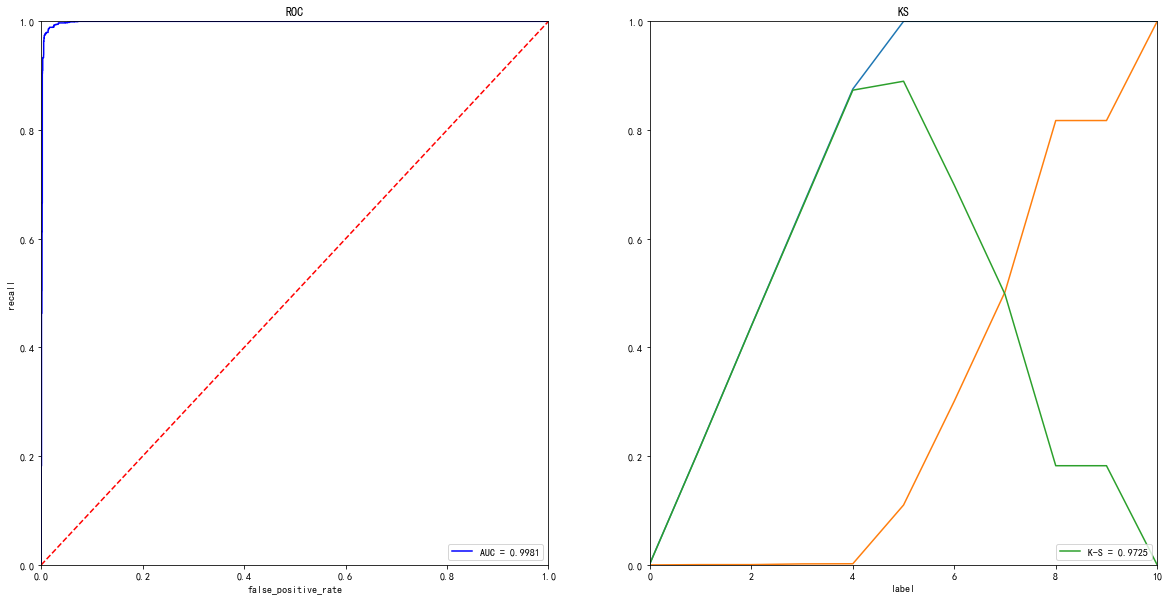

In [16]:
ls.plot_roc_ks(data_train,ls.score_card)

2021 14:14:50 INFO 预测用户分数中。。。
2021 14:14:50 INFO 根据cut离散化连续变量进行中。。。
100%|██████████| 6/6 [00:00<00:00, 300.54it/s]
2021 14:14:50 INFO 根据cut离散化连续变量完成！


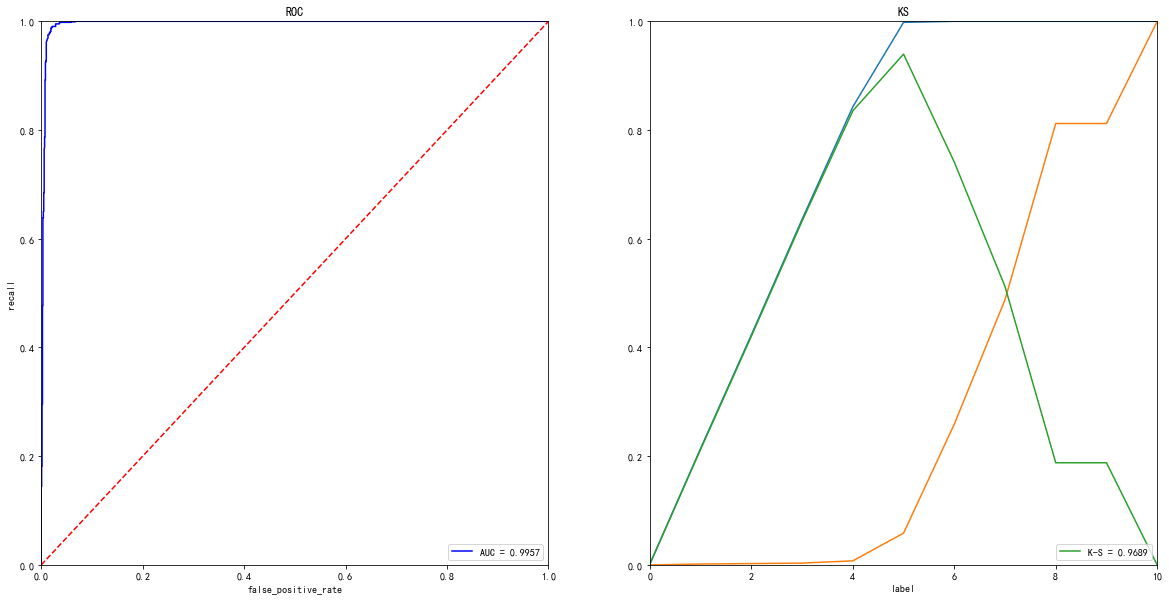

In [17]:
ls.plot_roc_ks(data_test,ls.score_card)

In [18]:
SCORE = ls.predict_score_proba(data,ls.score_card)

2021 14:14:57 INFO 预测用户分数中。。。
2021 14:14:57 INFO 根据cut离散化连续变量进行中。。。
100%|██████████| 6/6 [00:00<00:00, 231.38it/s]
2021 14:14:57 INFO 根据cut离散化连续变量完成！


In [19]:
ls.predict_score_proba(data,ls.score_card)

2021 14:14:59 INFO 预测用户分数中。。。
2021 14:14:59 INFO 根据cut离散化连续变量进行中。。。
100%|██████████| 6/6 [00:00<00:00, 200.35it/s]
2021 14:14:59 INFO 根据cut离散化连续变量完成！


,APRscore,BidAmountscore,CompanySizescore,Educationscore,LoanNumbersscore,PaidOffTimesscore,score,proba
0,-0.000000,-120.154137,13.577466,-146.444561,-387.030435,119.531556,79.479890,0.998787
1,-0.000000,-120.154137,13.577466,-146.444561,-387.030435,119.531556,79.479890,0.998787
2,-0.000000,-120.154137,80.800334,-146.444561,-387.030435,-21.579610,5.591592,0.999564
3,-0.000000,-120.154137,80.800334,-69.020426,53.198963,-361.318753,183.505981,0.994891
4,-0.000000,-120.154137,-176.994641,-69.020426,-387.030435,119.531556,-33.668082,0.999747
...,...,...,...,...,...,...,...,...
9033,-0.000000,-9.570114,80.800334,65.798007,53.198963,119.531556,909.758746,0.008192
9034,-0.000000,102.348663,13.577466,-69.020426,53.198963,119.531556,819.636222,0.028004
9035,109.855075,102.348663,-176.994641,-69.020426,53.198963,119.531556,738.919190,0.081061
9036,-0.000000,102.348663,80.800334,65.798007,53.198963,119.531556,1021.677523,0.001747


In [20]:
SCORE.to_csv("D:/Nikkidata/ren/csv/2.csv", index =0)

In [22]:
from numpy import inf

C:\Users\mb95424\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


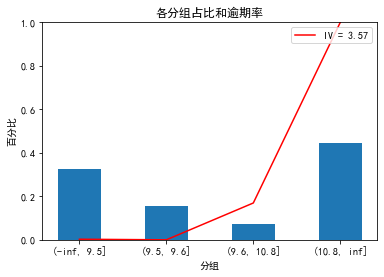

,cut_points,cut_points_id,1_num,0_num,total_num,1_pct,0_pct,total_pct,1_rate,woe,iv,total_iv
1,"(-inf, 9.5]",0,8,2945,2953,0.001929,0.602249,0.326732,0.002709,-5.743857,3.448157,3.570797
3,"(9.5, 9.6]",1,0,1391,1391,0.000000,0.284458,0.153906,0.000000,0.000000,0.000000,3.570797
2,"(9.6, 10.8]",2,113,554,667,0.027242,0.113292,0.073800,0.169415,-1.425211,0.122640,3.570797
0,"(10.8, inf]",3,4027,0,4027,0.970829,0.000000,0.445563,1.000000,0.000000,0.000000,3.570797


In [23]:
ls.plot_col_woe_iv(data,'APR',[-inf,9.5,9.6,10.8,inf])

2021 09:09:58 INFO 评分卡制作中。。。
2021 09:09:58 INFO 连续和离散变量划分中。。。
2021 09:09:58 INFO 连续和离散变量划分完成！
2021 09:09:58 INFO 根据cut离散化连续变量进行中。。。
100%|██████████| 6/6 [00:00<00:00, 261.55it/s]
2021 09:09:58 INFO 根据cut离散化连续变量完成！
2021 09:09:58 INFO WOE转换中。。。
  0%|          | 0/6 [00:00<?, ?it/s]C:\Users\mb95424\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
100%|██████████| 6/6 [00:00<00:00, 82.42it/s]
2021 09:09:58 INFO WOE转换完成！
C:\Users\mb95424\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
2021 09:09:59 INFO 评分卡制作完成！
2021 09:09:59 INFO 预测用户分数中。。。
2021 09:09:59 INFO 根据cut离散化连续变量进行中。。。
100%|██████████| 6/6 [00:00<00:00, 231.05it/s]
2021 09:09:59 INFO 根据cut离散化连续变量完成！


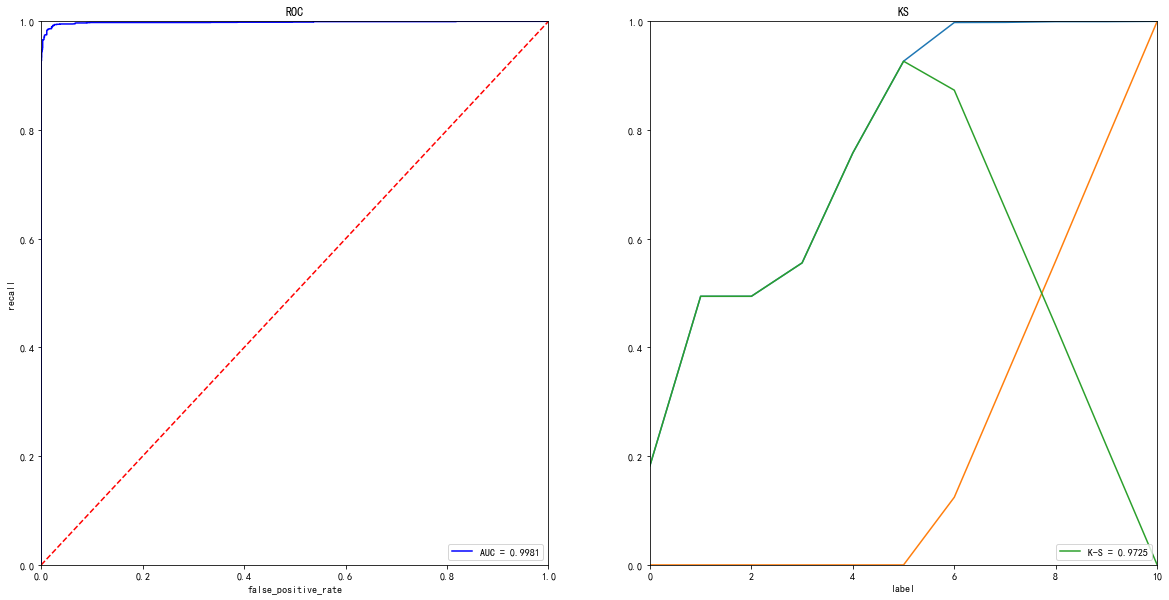

In [26]:
col_result=ls.col_result
col_continuous_cut_points=[col for col in ls.col_continuous_cut_points if col[0] in ls.col_result]
data_new=data_train[ls.col_result+['y']]

score_card=ls.get_logistic_socre_card(data_new,col_continuous_cut_points)
ls.plot_roc_ks(data_new,score_card)

2021 14:15:25 INFO 评分卡制作中。。。
2021 14:15:25 INFO 连续和离散变量划分中。。。
2021 14:15:25 INFO 连续和离散变量划分完成！
2021 14:15:25 INFO 根据cut离散化连续变量进行中。。。
100%|██████████| 24/24 [00:00<00:00, 334.16it/s]
2021 14:15:25 INFO 根据cut离散化连续变量完成！
2021 14:15:25 INFO WOE转换中。。。
  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\mb95424\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
100%|██████████| 24/24 [00:00<00:00, 87.19it/s]
2021 14:15:25 INFO WOE转换完成！
C:\Users\mb95424\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
2021 14:15:26 INFO 评分卡制作完成！
2021 14:15:26 INFO 预测用户分数中。。。
2021 14:15:26 INFO 根据cut离散化连续变量进行中。。。
100%|██████████| 24/24 [00:00<00:00, 353.73it/s]
2021 14:15:26 INFO 根据cut离散化连续变量完成！


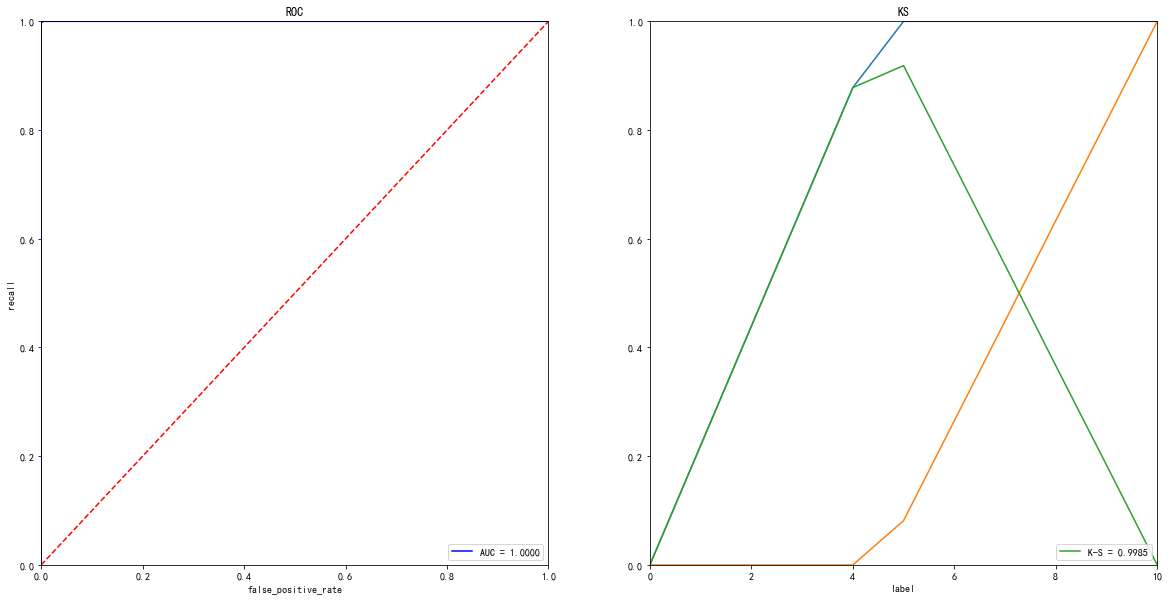

In [24]:
col_result=['y','CertifiMark','BidAmount', 'APR','GuaranteeWays', 'Sex', 'Age','Education', 'MaritalStatus','LoanNumbers', 'Credits','DefaultAmount'
             , 'SuccessfulNum','TotalAmount', 'DefaultTimes','PaidOffTimes'
             , 'SeriousDefaultLoan','Income', 'hasHouse','houseLoan'
             , 'hasCar ','carLoan', 'CompanySize','WorkingHour','OthDebt']
col_continuous_cut_points=[['CertifiMark', [-inf, 1.0, inf]],
 ['BidAmount', [-inf, 10000.0, 29900.0, 30000.0, inf]],
 ['APR', [-inf, 9.5, 9.6, 10.8, inf]],
 ['GuaranteeWays', [-inf, 0.0, inf]],
 ['Sex', [-inf, 1.0, inf]],
 ['Age', [-inf, 26.0, 31.0, 37.0, inf]],
 ['Education', [-inf, 1.0, 2.0, inf]],
 ['MaritalStatus', [-inf, 3.0, inf]],
 ['LoanNumbers', [-inf, 1.0, 2.0, 3.0, inf]],
 ['Credits', [-inf, 0.0, 30000.0, 60000.0, inf]],
 ['DefaultAmount', [-inf, 0.0, inf]],
 ['SuccessfulNum', [-inf, 1.0, inf]],
 ['TotalAmount', [-inf, 19000.0, 29900.0, 30000.0, inf]],
 ['DefaultTimes', [-inf, 0.0, inf]],
 ['PaidOffTimes', [-inf, 0.0, 1.0, inf]],
 ['SeriousDefaultLoan', [-inf, 0.0, inf]],
 ['Income', [-inf, 1.0, 2.0, 4.0, inf]],
 ['hasHouse', [-inf, 0.0, inf]],
 ['houseLoan', [-inf, 0.0, inf]],
 ['hasCar ', [-inf, 0.0, inf]],
 ['carLoan', [-inf, 0.0, inf]],
 ['CompanySize', [-inf, 1.0, 2.0, 3.0, inf]],
 ['WorkingHour', [-inf, 2.0, 3.0, inf]],
 ['OthDebt', [-inf, inf]]]
data_new=data_train[col_result]

score_card=ls.get_logistic_socre_card(data_new,col_continuous_cut_points)
ls.plot_roc_ks(data_new,score_card)